In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/churn-prediction-2/churn_dataset(1).csv
/kaggle/input/churnprediction/Churn Prediction for ConnectSphere Telecom (2).ipynb


In [4]:
import pandas as pd

df = pd.read_csv('//kaggle/input/churn-prediction-2/churn_dataset(1).csv')

df.head()


,customer_id,call_duration,data_usage,contract_length,churn
0,CUST0001,324.84,6.39,23,0
1,CUST0002,293.09,7.86,12,0
2,CUST0003,332.38,2.90,17,0
3,CUST0004,376.15,5.84,8,0
4,CUST0005,288.29,4.02,11,0


In [5]:
print("Dataset shape:", df.shape)
print("\nColumn info:")
print(df.dtypes)


Dataset shape: (500, 5)

Column info:
customer_id         object
call_duration      float64
data_usage         float64
contract_length      int64
churn                int64
dtype: object


In [6]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
customer_id        0
call_duration      0
data_usage         0
contract_length    0
churn              0
dtype: int64


In [7]:
print("\nChurn value counts:")
print(df['churn'].value_counts())



Churn value counts:
churn
0    405
1     95
Name: count, dtype: int64


In [8]:
df.describe()


,call_duration,data_usage,contract_length,churn
count,500.000000,500.00000,500.000000,500.000000
mean,300.341840,5.04752,12.188000,0.190000
std,49.062627,1.46702,6.846489,0.392694
min,137.940000,0.95000,1.000000,0.000000
25%,264.982500,4.10500,6.000000,0.000000
50%,300.640000,5.04000,12.000000,0.000000
75%,331.842500,5.98000,18.000000,0.000000
max,492.640000,8.95000,24.000000,1.000000


In [9]:
df.duplicated().sum()

0

In [10]:
# Total churned customers
total_churners = df[df['churn'] == 1].shape[0]
total_customers = df.shape[0]
# Percentage calculation
churn_percent = (total_churners / total_customers) * 100

# Print result
print(f"Total customers: {total_customers}")
print(f"Churned customers: {total_churners}")
print(f"Churn Percentage: {churn_percent:.2f}%")


Total customers: 500
Churned customers: 95
Churn Percentage: 19.00%


In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


2025-07-17 16:08:53.494284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752768533.761476      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752768533.841426      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
# Features (without customer_id and churn)
X = df.drop(['customer_id', 'churn'], axis=1)

# Target variable
y = df['churn']


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
scaler = StandardScaler()

# Scale training data (fit + transform)
X_train_scaled = scaler.fit_transform(X_train)

# Scale testing data (only transform)
X_test_scaled = scaler.transform(X_test)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN model create
model = Sequential()

# Input Layer + First Hidden Layer
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))

# Second Hidden Layer
model.add(Dense(8, activation='relu'))

# Output Layer (binary classification: churn or not)
model.add(Dense(1, activation='sigmoid'))  # sigmoid for 0 or 1


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-17 16:09:10.032316: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, 
                    epochs=20, 
                    batch_size=16, 
                    validation_split=0.1, 
                    verbose=1)


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.2662 - loss: 0.7848 - val_accuracy: 0.5750 - val_loss: 0.7025
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5710 - loss: 0.7026 - val_accuracy: 0.8000 - val_loss: 0.6390
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6961 - loss: 0.6607 - val_accuracy: 0.8500 - val_loss: 0.5931
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7708 - loss: 0.6188 - val_accuracy: 0.8500 - val_loss: 0.5549
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8012 - loss: 0.5829 - val_accuracy: 0.8500 - val_loss: 0.5228
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7700 - loss: 0.5797 - val_accuracy: 0.8500 - val_loss: 0.4966
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8007 - loss: 0.5432 - val_accuracy: 0.8500 - val_loss: 0.4761
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7646 - loss: 0.5545 - val_accuracy: 0.8500 - val_loss

In [17]:
# Predict on test data
y_pred_prob = model.predict(X_test_scaled)

# Convert probabilities to 0 or 1
y_pred = (y_pred_prob > 0.5).astype("int32")

# Evaluate accuracy and F1-score
from sklearn.metrics import accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Accuracy: 0.87
F1 Score: 0.00


In [18]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))


{0: 100}

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


ModuleNotFoundError: No module named 'sklearn.utils._metadata_requests'

In [20]:
# Predict probabilities for all customers
all_predictions = model.predict(scaler.transform(X))

# Add predictions to original dataframe
df['churn_probability'] = all_predictions

# Tag customers as at-risk (probability > 0.5)
df['at_risk'] = (df['churn_probability'] > 0.5).astype(int)

# Filter only at-risk customers
at_risk_customers = df[df['at_risk'] == 1]

# Display top 10 at-risk customers
at_risk_customers[['customer_id', 'call_duration', 'data_usage', 'contract_length', 'churn_probability']].head(10)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,customer_id,call_duration,data_usage,contract_length,churn_probability


In [22]:
#Data Visualization using Seaborn & Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Plot styling
sns.set(style='whitegrid')


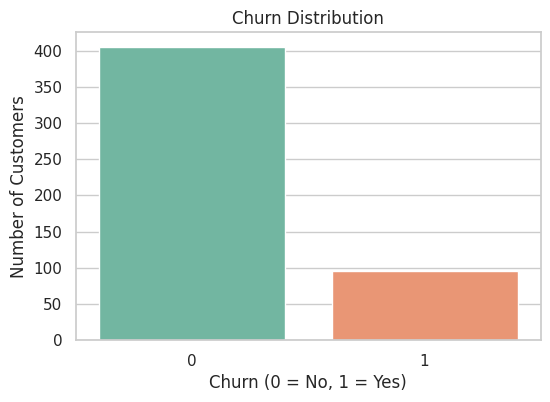

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x='churn', data=df, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()


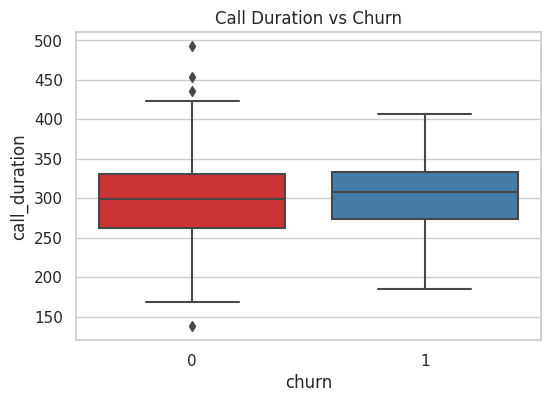

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x='churn', y='call_duration', data=df, palette='Set1')
plt.title('Call Duration vs Churn')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

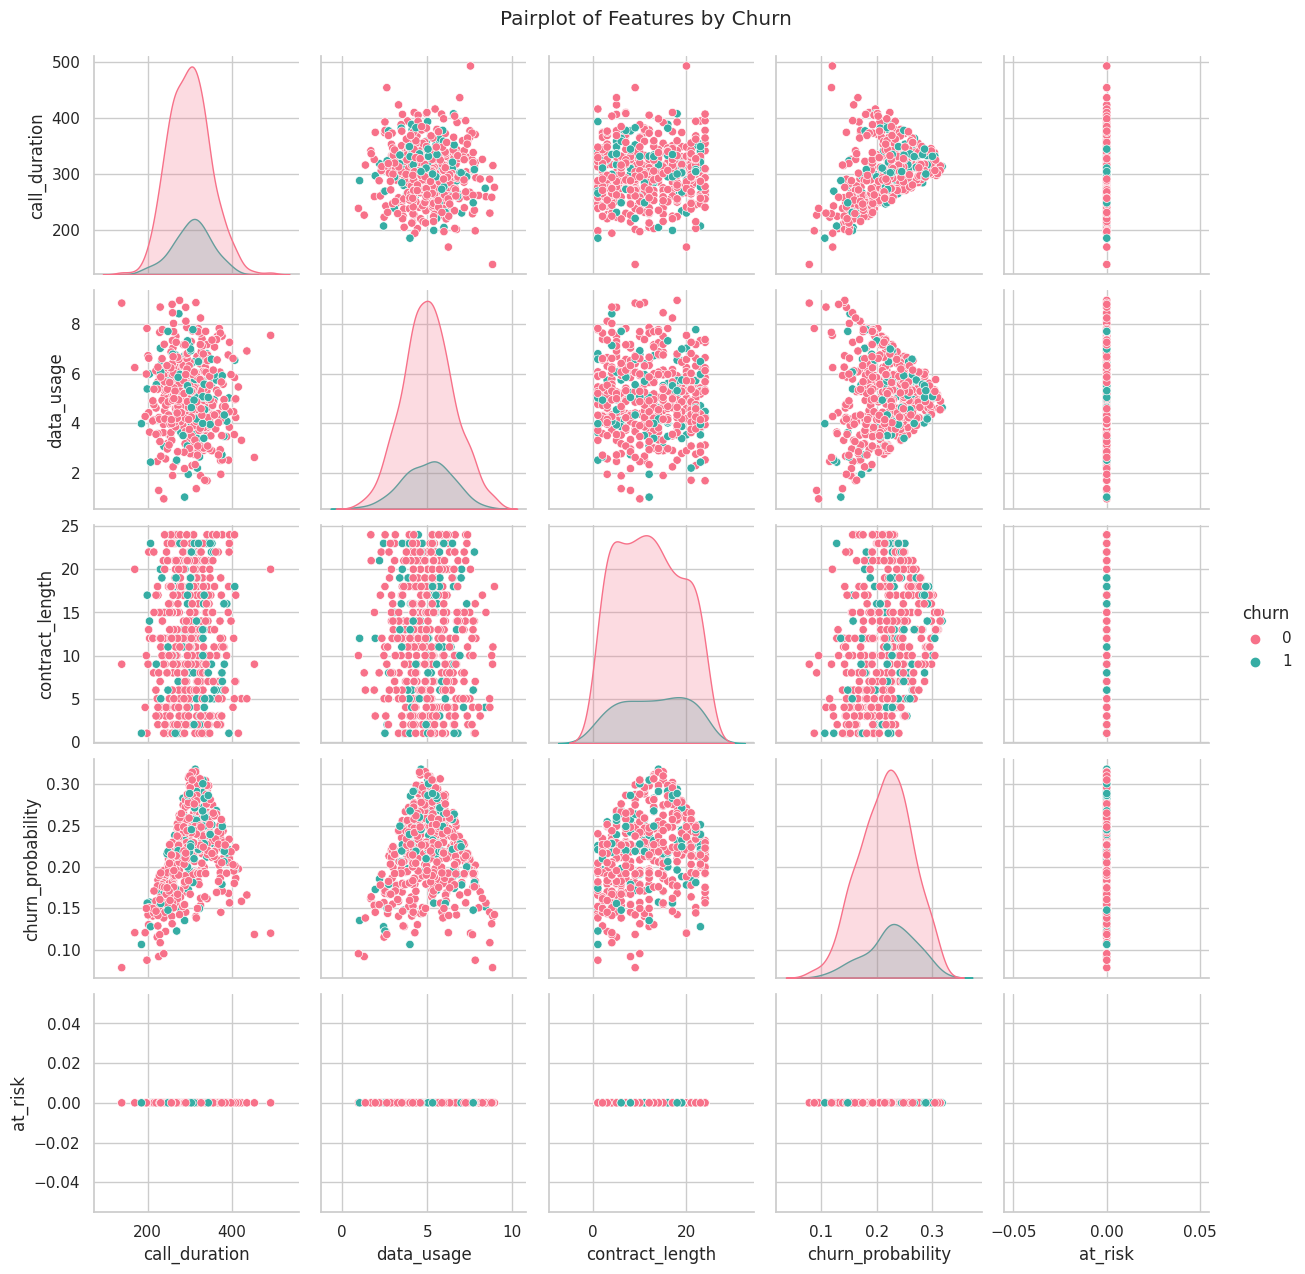

In [25]:
sns.pairplot(df, hue='churn', palette='husl')
plt.suptitle('Pairplot of Features by Churn', y=1.02)
plt.show()
